importing Jupyter notebook from C:\Users\posor\OneDrive\Asztali gép\szakdolgozat_repo\szakdolgozat\szakdolgozat\notebooks\test.ipynb


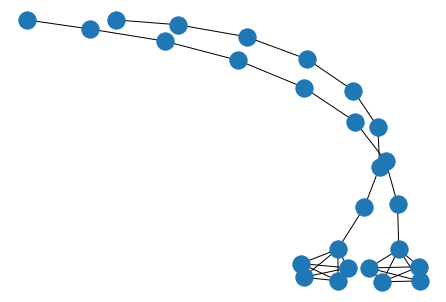

In [1]:
import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell
import networkx as nx
import matplotlib.pyplot as plt

cwd = os.getcwd()
sys.path.insert(0, cwd+'\\notebooks')

def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path

    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path
        
class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path

    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)

        print ("importing Jupyter notebook from %s" % path)

        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = read(f, 4)


        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod

        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__

        try:
          for cell in nb.cells:
            if cell.cell_type == 'code':
                # transform the input to executable Python
                code = self.shell.input_transformer_manager.transform_cell(cell.source)
                # run the code in themodule
                exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod
        
class NotebookFinder(object):
    """Module finder that locates Jupyter Notebooks"""
    def __init__(self):
        self.loaders = {}

    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return

        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)

        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]
    
sys.meta_path.append(NotebookFinder())

import notebooks.test as test
import notebooks.create_from_txt as txtreader
import notebooks.link_prediction as lp
from notebooks.link_prediction import plotting

#G = nx.Graph()


In [ ]:
G = txtreader.from_txt("facebook_combined.txt")

In [ ]:
nx.draw(G,node_size=1)
plt.draw()

In [ ]:
G = txtreader.from_csv("BTCAlphaNet.csv")

In [ ]:
nx.draw(G,node_size=1)
plt.draw()

In [ ]:
G2 = G.copy() 
error_data=lp.lp(G2)

In [ ]:
print(error_data) 

p_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
plt.plot(p_values,error_data)
plt.ylim([0, 1])

In [ ]:
G2 = G.copy() 
error_data=lp.lp(G2, alpha = 0.1)

In [ ]:
print(error_data)
p_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
plt.plot(p_values,error_data)
plt.ylim([0, 1])

In [ ]:
G2 = G.copy() 
error_data=lp.lp_constant_p(G2, 0.1)


In [ ]:
G2 = G.copy() 
result = lp.draw_plots(G2, 0.1)

Alpha value: 0.1
row: 0 column: 0
Alpha value: 0.2
row: 0 column: 1
Alpha value: 0.3
row: 0 column: 2
Alpha value: 0.4
row: 1 column: 0
Alpha value: 0.5
row: 1 column: 1
Alpha value: 0.6
row: 1 column: 2
Alpha value: 0.7
row: 2 column: 0
Alpha value: 0.8
row: 2 column: 1
Alpha value: 0.9
row: 2 column: 2


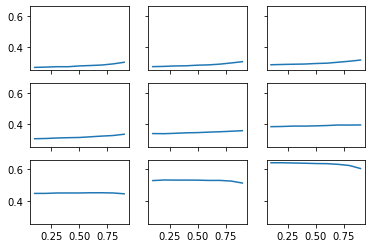

In [2]:
plotting('result-2021-03-11-12-30-41.txt')